# CI data analysis: heatmaps for countries comparisons

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.gridspec as gridspec # for subplots
from utils_CI_analysis import *
import math

# data preparation:
_dfs = load_data()

# countries to study:
countries = ['Ireland', 'Germany', 'Great Britain', 'France', 'Sweden', 'Finland', 'Belgium']
list_colors = ['blue', 'green', 'orange', 'red', 'purple', 'pink', 'yellow']

# countries = ['Ireland', 'Germany', 'Great Britain']
# list_colors = ['red', 'green', 'blue']

## Comparison of average CI of the next 24 hours

We set a start date, and then we compute the average CI over the next 24 hours, for each countries. 

Below, we display the difference of average within a heatmap.
A green color means that the difference between the row country average and the column country average is positive. In other words, the average of the row country is the largest and it would be more beneficial to do compute work in the column country than in the raw country.
A red color means the opposite.

Below, we also display the raw data of each country over the next 24 hours for reference.

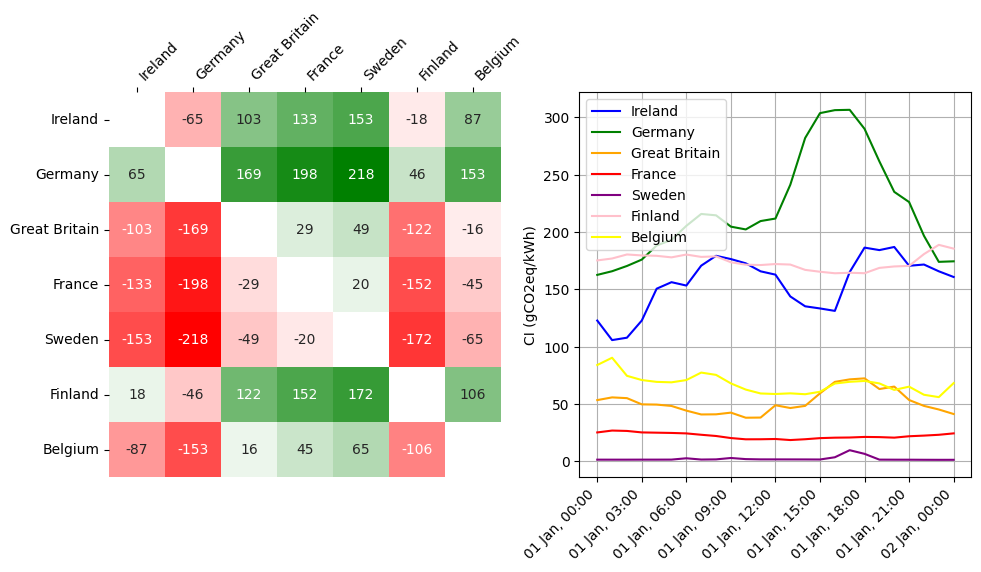

In [2]:
# --- Data you can change --- #
start_date = datetime(2022, 1, 1, 0, 0) # year, month, day, hour, min
end_date = start_date + timedelta(hours=24)
# --------------------------- #

countries_test = countries

# create stats_countries:
stats_countries = dict(zip(countries, [{'mean':float, 'std':float} for ii in range(len(countries))]))
for country_idx, country in enumerate(countries_test):
    stats_countries[country]['mean']=get_CI_values(_dfs, country, start_date, end_date).mean()
    stats_countries[country]['std']=get_CI_values(_dfs, country, start_date, end_date).std()

# create the similarity matrix:
similarity_matrix  = pd.DataFrame(index = countries, columns = countries)
for country1 in countries:
    for country2 in countries:
        similarity_matrix.loc[country1, country2] = stats_countries[country1]['mean'] - stats_countries[country2]['mean']

# plots:
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs[0, 1])
plot_raw_data(ax, countries_test, _dfs, start_date, end_date)
ax = plt.subplot(gs[0, 0])
plot_heatmap(ax, similarity_matrix)
plt.show()

## Comparison hour by hour over the next 24 hours

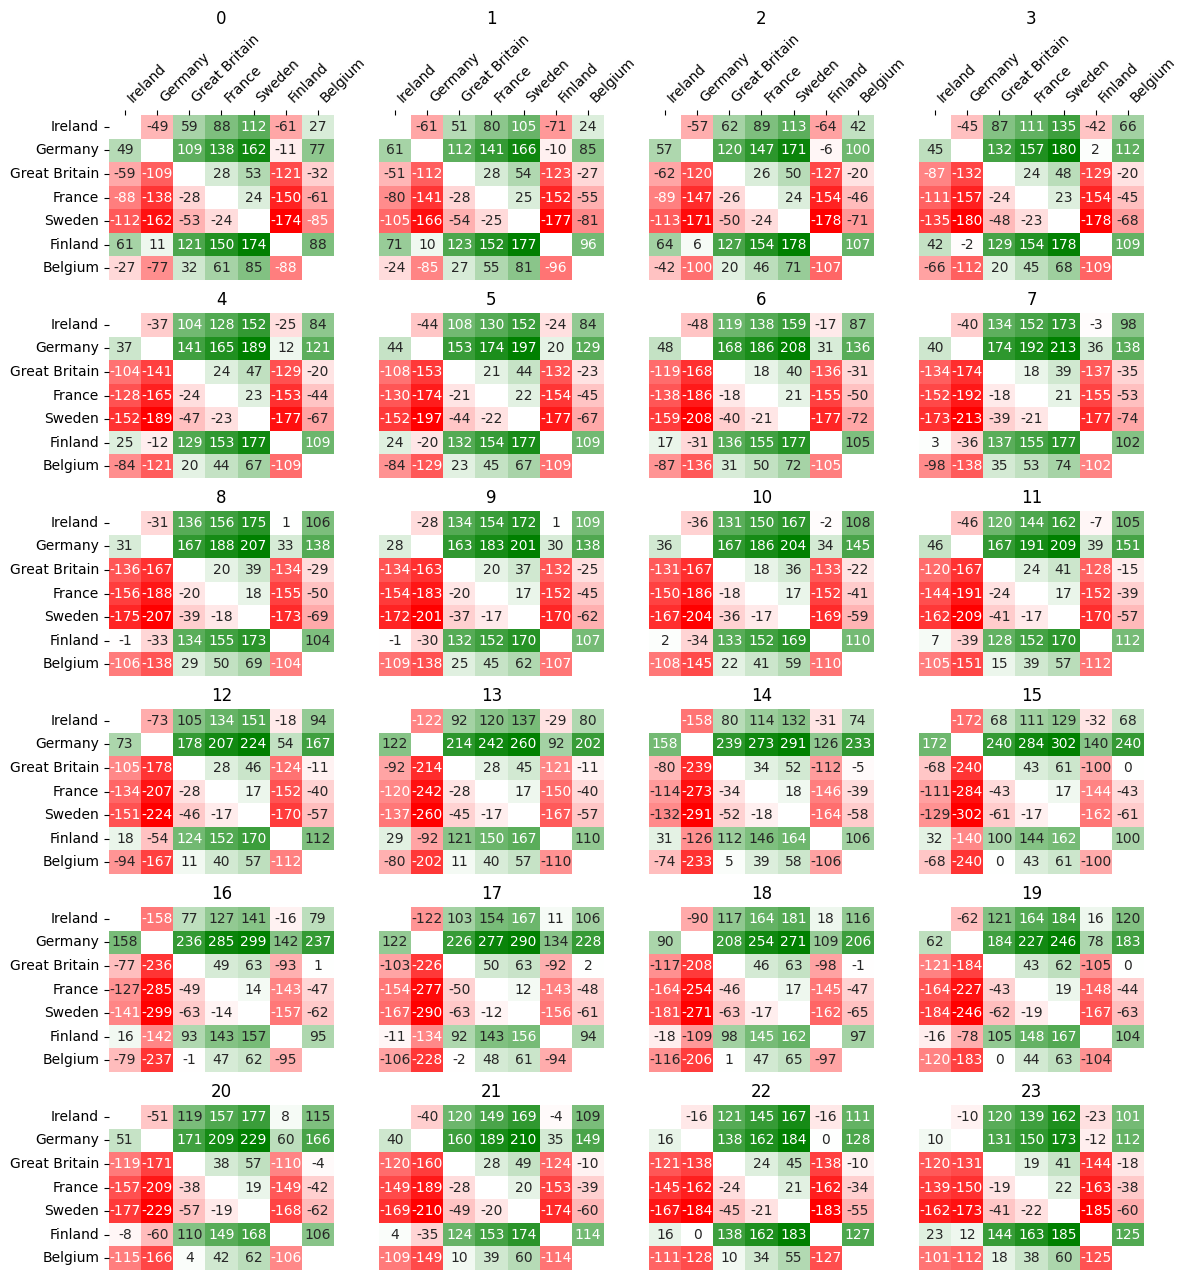

In [3]:
def create_similarity_matrix(_dfs, countries, start_date, delta_hours):

    end_date = start_date + timedelta(hours=delta_hours)

    countries_test = countries

    # create stats_countries:
    stats_countries = dict(zip(countries, [{'mean':float, 'std':float} for ii in range(len(countries))]))
    for country_idx, country in enumerate(countries_test):
        stats_countries[country]['mean']=get_CI_values(_dfs, country, start_date, end_date).mean()
        stats_countries[country]['std']=get_CI_values(_dfs, country, start_date, end_date).std()

    # create the similarity matrix:
    similarity_matrix  = pd.DataFrame(index = countries, columns = countries)
    for country1 in countries:
        for country2 in countries:
            similarity_matrix.loc[country1, country2] = stats_countries[country1]['mean'] - stats_countries[country2]['mean']

    return similarity_matrix




# --- Data you can change --- #
delta_hours=1
start_date = datetime(2022, 1, 1, 0, 0) # year, month, day, hour, min
# --------------------------- #

nb_cols = 4

fig = plt.figure(figsize=(18, 15))
gs = gridspec.GridSpec(math.ceil(24/(delta_hours*nb_cols)), 4)

cpt=0
for i in range(0, 24, delta_hours):

    similarity_matrix = create_similarity_matrix(_dfs, countries, start_date, delta_hours)

    ax = plt.subplot(gs[cpt//nb_cols, cpt%nb_cols])
    plot_heatmap(ax, similarity_matrix)
    plt.title(str(i))
    if i >= nb_cols:
        plt.xticks([])
    if i%nb_cols > 0:
        plt.yticks([])
    
    start_date += timedelta(hours=delta_hours)
    cpt+=1

plt.show()